In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import csv
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from plotnine import *

In [4]:
ls -lah ../results/

total 77M
drwxrwsr-x 14 ilya lab 4.0K Nov 23  2021 ./
drwxrwsr-x  6 ilya lab 4.0K Nov  2  2021 ../
-rw-rw-r--  1 ilya lab 2.1M Nov 16  2021 count_matrix_1.csv
-rw-rw-r--  1 ilya lab 2.1M Nov  3  2021 count_matrix.csv
-rw-rw-r--  1 ilya lab 1.4M Jan 13  2022 count_matrix_ctrl.csv
-rw-rw-r--  1 ilya lab 1.4M Nov 16  2021 count_matrix_SAM.csv
drwxrwsr-x  2 ilya lab 4.0K Nov 10  2021 lg01/
drwxrwsr-x  2 ilya lab 4.0K Nov 10  2021 lg02/
drwxrwsr-x  2 ilya lab 4.0K Nov 10  2021 lg03/
drwxrwsr-x  2 ilya lab 4.0K Nov 10  2021 lg04/
drwxrwsr-x  2 ilya lab 4.0K Nov 10  2021 lg05/
drwxrwsr-x  2 ilya lab 4.0K Nov 10  2021 lg06/
drwxrwsr-x  2 ilya lab 4.0K Nov 10  2021 lg07/
drwxrwsr-x  2 ilya lab 4.0K Nov 10  2021 lg08/
drwxrwsr-x  2 ilya lab 4.0K Nov 10  2021 lg09/
drwxrwsr-x  2 ilya lab 4.0K Nov 10  2021 lg10/
drwxrwsr-x  2 ilya lab 4.0K Nov 10  2021 lg11/
drwxrwsr-x  2 ilya lab 4.0K Nov 10  2021 lg12/
-rw-rw-r--  1 ilya lab 8.6M Nov 11  2021 N2_vs_SAM_1.pyg.deseq.csv
-rw-rw-r--  1 ilya lab 8.6M

In [5]:
!head ../results/count_matrix_SAM.csv

Ctrl4,Ctrl5,Ctrl6,pyg4,pyg5,pyg6
WBGene00000001,1465,1129,1024,2369,1066,734
WBGene00000002,661,455,617,504,546,238
WBGene00000003,358,285,392,342,341,207
WBGene00000004,704,369,522,713,405,242
WBGene00000005,454,338,474,492,472,242
WBGene00000006,474,207,293,467,262,139
WBGene00000007,380,298,368,346,315,188
WBGene00000008,35,32,44,32,44,16
WBGene00000009,39,25,30,35,32,12


In [6]:
df = pd.read_csv('../results/count_matrix_SAM.csv', index_col=None, skipfooter=5, engine='python')
df

,Ctrl4,Ctrl5,Ctrl6,pyg4,pyg5,pyg6
WBGene00000001,1465,1129,1024,2369,1066,734
WBGene00000002,661,455,617,504,546,238
WBGene00000003,358,285,392,342,341,207
WBGene00000004,704,369,522,713,405,242
WBGene00000005,454,338,474,492,472,242
...,...,...,...,...,...,...
WBGene00255578,0,0,0,0,0,0
WBGene00255579,2,0,0,4,1,0
WBGene00255580,0,0,0,0,0,0
WBGene00255581,0,0,1,0,0,0


In [7]:
df.describe()

,Ctrl4,Ctrl5,Ctrl6,pyg4,pyg5,pyg6
count,4.674300e+04,4.674300e+04,4.674300e+04,4.674300e+04,4.674300e+04,4.674300e+04
mean,7.752833e+02,4.710346e+02,6.088720e+02,6.953206e+02,5.451041e+02,3.177817e+02
std,2.068089e+04,1.103635e+04,1.742460e+04,1.495756e+04,1.463567e+04,8.958400e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.000000e+01,3.900000e+01,4.700000e+01,5.100000e+01,4.300000e+01,2.500000e+01
max,3.136402e+06,1.650218e+06,2.625981e+06,2.222668e+06,2.177820e+06,1.336600e+06


In [9]:
# build expression matrix
    
# Same as .fit() and then .transform()
X_std = StandardScaler().fit_transform(df.values.T)
X_std

array([[ 0.31872731,  1.15104898,  0.62026579, ...,  0.        ,
        -0.4472136 , -0.4472136 ],
       [-0.32190505, -0.35445   , -0.5980141 , ...,  0.        ,
        -0.4472136 , -0.4472136 ],
       [-0.52210266,  0.82948609,  1.18768382, ...,  0.        ,
         2.23606798, -0.4472136 ],
       [ 2.04233341,  0.00365412,  0.35324554, ...,  0.        ,
        -0.4472136 , -0.4472136 ],
       [-0.44202362,  0.31060052,  0.33655677, ...,  0.        ,
        -0.4472136 ,  2.23606798],
       [-1.0750294 , -1.94033972, -1.89973782, ...,  0.        ,
        -0.4472136 , -0.4472136 ]])

## Principal Component Analisys (PCA)

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the `SVD`.

The resulting components are ranked by the amount of variance explained in the data.

In [10]:
sklearn_pca = sklearnPCA(n_components=4)
Y = sklearn_pca.fit_transform(X_std)
print(Y)
print(sklearn_pca.explained_variance_)
print(sklearn_pca.explained_variance_ratio_)

[[-113.34156052  -78.22094526  -74.82053067  -31.41150458]
 [  55.65088981   10.9376077   -19.00317033  -12.69631308]
 [   3.31450827  -78.58558792   93.88966493  -33.32434841]
 [-153.22645258  123.13634455   24.4685263     5.79198163]
 [  31.39724496  -39.00501714   -2.33691292   99.98827345]
 [ 176.20537006   61.73759808  -22.19757732  -28.34808901]]
[14293.35640884  6581.86477938  3174.28077038  2618.64144223]
[0.49288796 0.22696712 0.10946098 0.09030047]


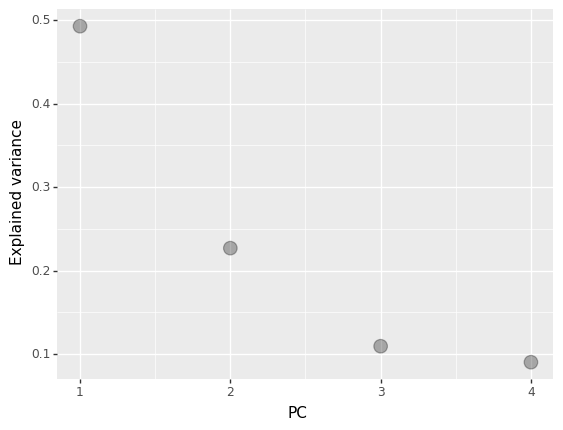

<ggplot: (8744600061681)>

In [11]:
vdf = pd.DataFrame()
vdf['PC'] = [(i+1) for i,x in enumerate(sklearn_pca.explained_variance_ratio_)]
vdf['var'] = sklearn_pca.explained_variance_ratio_

(ggplot(vdf, aes(x='PC', y='var'))
    + geom_point(size=5, alpha=0.3)
    + ylab('Explained variance')
)

In [15]:
pca_df = pd.DataFrame()
pca_df['condition'] = ['Ctrl']*3 + ['pyg']*3
pca_df['PC1'] = Y[:,0]
pca_df['PC2'] = Y[:,1]

pca_df

,condition,PC1,PC2
0,Ctrl,-113.341561,-78.220945
1,Ctrl,55.650890,10.937608
2,Ctrl,3.314508,-78.585588
3,pyg,-153.226453,123.136345
4,pyg,31.397245,-39.005017
5,pyg,176.205370,61.737598


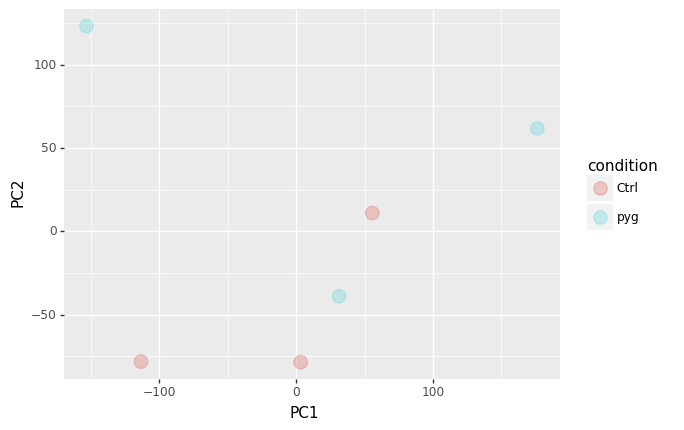

<ggplot: (8744600058341)>

In [17]:
(ggplot(pca_df, aes(x='PC1', y='PC2', color='condition'))
    + geom_point(size=5, alpha=0.3)
)